# interpolatespectra.py_example 

This module constains a set of functions designed to attach a label to each fitted peak in an unknown spectra based on fed in known calibration spectra.These functions are primarily accessed in an automated fashion via the peakidentify.py module.

This module contains the following functions:
1. interpolatespectra.generate_spectra_dataset()
2. interpolatespectra.keyfinder()
3. interpolatespectra.

Developed by the Raman-Noodles team (2019 DIRECT Cohort, University of Washington)

# import 

In [2]:
import os
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import lineid_plot
from ramandecompy import spectrafit
from ramandecompy import peakidentify
from ramandecompy import dataprep
from ramandecompy import datavis
from ramandecompy import dataimport
from ramandecompy import interpolatespectra
from scipy import interpolate

In [3]:
dataprep.new_hdf5('combined_calibration_dataset')
dataprep.add_calibration('combined_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/water.xlsx', 'water')
dataprep.add_calibration('combined_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx', 'hydrogen')
dataprep.add_calibration('combined_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx', 'methane')
dataprep.add_calibration('combined_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx', 'carbon monoxide')
dataprep.add_calibration('combined_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/CO2_100wt%.csv', 'carbon dioxide')
dataprep.add_calibration('combined_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/sapphire.xlsx', 'sapphire')
dataprep.add_calibration('combined_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Propane_test.xlsx', 'Propane')
dataprep.add_calibration('combined_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Ethane_test.xlsx', 'Ethane')
dataprep.add_calibration('combined_calibration_dataset.hdf5', '../ramandecompy/tests/test_files/Acetaldehyde_test.xlsx', 'Acetaldehyde')

Data from ../ramandecompy/tests/test_files/water.xlsx fit with compound pseudo-Voigt model.
     Results saved to combined_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model.
     Results saved to combined_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model.
     Results saved to combined_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/CarbonMonoxide_Baseline_Calibration.xlsx fit with compound pseudo-Voigt model.
     Results saved to combined_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/CO2_100wt%.csv fit with compound pseudo-Voigt model.
     Results saved to combined_calibration_dataset.hdf5.
Data from ../ramandecompy/tests/test_files/sapphire.xlsx fit with compound pseudo-Voigt model.
     Results saved to combined_calibration_dataset.hdf5.
Data from ../ramandeco

In [4]:
dataprep.new_hdf5('combined_calibration_cal')

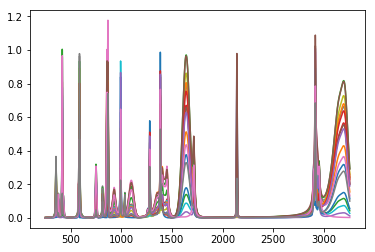

In [5]:
# first a function that will return a normalized interpolated spectra
# compound = 'water'
hdf5_interpfilename = 'combined_calibration_cal.hdf5'
hdf5_calfilename ='combined_calibration_dataset.hdf5'
spectra_count = 2
calhdf5 = h5py.File(hdf5_calfilename, 'r+')
hdf5 = h5py.File(hdf5_interpfilename, 'r+')
# get list of compounds from hdf5 file
y_data_list = []
x_data_list = []
labels = []
compound_list = list(calhdf5.keys())
for target_compound in compound_list:
    x_data, y_data, label = interpolatespectra.generate_spectra_dataset(hdf5_calfilename, target_compound, spectra_count)


In [ ]:
def combined_interpolatedfit(hdf5_interpfilename, hdf5_calfilename, spectra_count):
    """
    This function combines the interpolated spectra generated previously and spectrafits them.
    It returns a list of DataFrames which contains the peak fitted data and peak descriptors of the 
    interpolated spectra for each iteration of spectra_counts for each target compound in 
    the compound list of the calibration file. Therefore, this function iterates over of spectra_counts
    for each target compound in the compound list of the calibration file

    Args:
        hdf5_interpfilename (str): the filename and location of an existing hdf5 file to add the
                             interpolated data to.
        hdf5_calfilename (str): the filename and location of an existing hdf5 file with
                             calibration data to compare.
        spectra_count (int): number of spectra to be counted.
        x_data (list like): The x-values of the generated interpolated spectra
                            for which the model will be fit.
        y_data (list like): The y-values of the generated interpolated spectra
                            for which the model will be fit.
        label (int): The binary values of the generated interpolated spectra
                             

    Returns:
        frames (list): list of DataFrames which contain the peak fitted datapeak descriptors
        of the classified interpolated spectra for each iteration of spectra_counts for
        each target compound in the compound list of the calibration file.
    """
    if not isinstance(hdf5_interpfilename, str):
        raise TypeError("""Passed value of `hdf5_interpfilename` is not a string!
        Instead, it is: """+ str(type(knownhdf5_filename)))
    if not hdf5_interpfilename.split('/')[-1].split('.')[-1] == 'hdf5':
        raise TypeError("""`hdf5_interpfilename` is not type = .hdf5!
        Instead, it is: """+ hdf5_interpfilename.split('/')[-1].split('.')[-1])
    if not isinstance(hdf5_calfilename, str):
        raise TypeError("""Passed value of `hdf5_calfilename` is not a string!
        Instead, it is: """+ str(type(hdf5_calfilename)))
    if not hdf5_calfilename.split('/')[-1].split('.')[-1] == 'hdf5':
        raise TypeError("""`hdf5_calfilename` is not type = .hdf5!
        Instead, it is: """+ hdf5_calfilename.split('/')[-1].split('.')[-1])
    if not isinstance(spectra_count, int):
        raise TypeError("""Passed value of `spectra_count` is not an int!
        Instead, it is: """ + str(type(spectra_count)))
    hdf5 = h5py.File(hdf5_calfilename, 'r+')
    # get list of compounds from hdf5 file
    y_data_list = []
    x_data_list = []
    frames = []
    compound_list = list(hdf5.keys())
    print(compound_list)
    for _, target_compound in enumerate(compound_list):
        x_data, y_data, labels = generate_spectra_dataset(hdf5_calfilename, target_compound, spectra_count)
        y_data_list.append(y_data)
        x_data_list.append(x_data)
        for i, label in enumerate(labels):
            interpdf = interpolatedfit(hdf5_interpfilename, 'interp_'+target_compound, x_data_list, y_data_list, i) 
            frames.append(interpdf)
    return frames

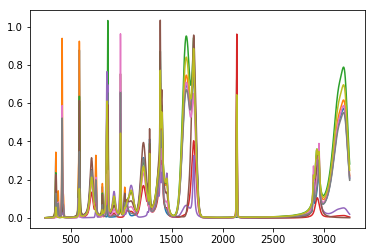

In [19]:
"""
Module used to unit test the functionality and outputs of the interpolatespectra.py module
"""
import math
import h5py
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import lineid_plot
import pandas as pd
from scipy import interpolate
from ramandecompy import spectrafit
from ramandecompy import peakidentify
from ramandecompy import dataprep
from ramandecompy import datavis
from ramandecompy import dataimport
from ramandecompy import interpolatespectra

# dataprep.new_hdf5('ramandecompy/tests/test_files/interpolated_spectra_calibration_file')
hdf5_interpfilename = '../ramandecompy/tests/test_files/interpolated_spectra_calibration_file.hdf5'
interphdf5 = h5py.File(hdf5_interpfilename, 'r+')
hdf5_calfilename = '../ramandecompy/tests/test_files/peakidentify_calibration_test.hdf5'
hdf5 = h5py.File(hdf5_calfilename, 'r+')

# first a function that will return a normalized interpolated spectra
hdf5_interpfilename = '../ramandecompy/tests/test_files/interpolated_spectra_calibration_file.hdf5'
hdf5_calfilename = '../ramandecompy/tests/test_files/peakidentify_calibration_test.hdf5'
spectra_count = 1
hdf5 = h5py.File(hdf5_calfilename, 'r+')
interphdf5 = h5py.File(hdf5_interpfilename, 'r+')
# get list of compounds from hdf5 file
y_data_list = []
x_data_list = []
compound_list = list(hdf5.keys())
key = 'water'
for _, target_compound in enumerate(compound_list):
    x_data, y_data, labels = interpolatespectra.generate_spectra_dataset(hdf5_calfilename, target_compound, spectra_count)
    y_data_list.append(y_data)
    x_data_list.append(x_data)
def test_keyfinder():
    """
    This function tests the operation of the keyfinder
    function in interpolatespectra.py
    """
    # run function
    interpolatespectra.keyfinder('../ramandecompy/tests/test_files/dataimport_experiment_files.hdf5')
    exp_file = h5py.File('../ramandecompy/tests/test_files/dataimport_experiment_files.hdf5', 'r')
    # make assertions
    assert len(exp_file) == 10, 'incorrect number of 1st order groups'
    assert list(exp_file.keys())[0] == '300C', '1st order group name incorrect'
    assert len(exp_file['300C']) ==5, 'incorrect number of 2nd order groups'
    assert list(exp_file['300C'].keys())[0] == '25s', '2nd order group name incorrect'
    assert '300C/25s/wavenumber' in exp_file, 'x data (wavenumber) not stored correctly'
    assert '300C/25s/counts' in exp_file, 'y data (counts) not stored correctly'
    assert len(exp_file['300C/25s']) == 19, 'incorrect number of peaks + raw_data stored'
    # test inputs
    try:
        interpolatespectra.keyfinder(4.2)
    except TypeError:
        print('A float was passed to the function, and it was handled well with a TypeError.')
    try:
        interpolatespectra.keyfinder('test.txt')
    except TypeError:
        print('A .txt was passed to the function, and it was handled well with a TypeError.')

def test_interpolatedfit():
    """
    This function tests the operation of the interpolatedfit
    function in interpolatespectra.py
    """
    # Run function
    for i, label in enumerate(labels):
        interpolatespectra.interpolatedfit(hdf5_interpfilename, key, x_data, y_data, i)
    # test inputs
    try:
        interpolatespectra.interpolatedfit(4.2, key, x_data, y_data, i)
    except TypeError:
        print('A float was passed to the function as `hdf5_filename`, and it was handled well with a TypeError.')
    try:
        interpolatespectra.interpolatedfit('test.txt', key, x_data, y_data, i)
    except TypeError:
        print('A .txt was passed to the function as `hdf5_filename`, and it was handled well with a TypeError.')
    try:
        interpolatespectra.interpolatedfit(hdf5_filename, 4.2, x_data, y_data, i)
    except TypeError:
        print('A float was passed to the function as `key`, and it was handled well with a TypeError.')
    try:
        interpolatespectra.interpolatedfit(hdf5_filename, 'test.txt', x_data, y_data, i)
    except TypeError:
        print('A .txt was passed to the function as `key`, and it was handled well with a TypeError.')
    try:
        interpolatespectra.interpolatedfit(hdf5_filename, key, 4.2, y_data, i)
    except TypeError:
        print('A float was passed to the function, and it was handled well with a TypeError.')
    try:
        interpolatespectra.interpolatedfit(hdf5_filename, key, 'x_data', y_data, i)
    except TypeError:
        print('A float was passed to the function, and it was handled well with a TypeError.')
    try:
        interpolatespectra.interpolatedfit(hdf5_filename, key, x_data, 4.2, i)
    except TypeError:
        print('A float was passed to the function, and it was handled well with a TypeError.')
    try:
        interpolatespectra.interpolatedfit(hdf5_filename, key, x_data, 'y_data', i)
    except TypeError:
        print('A .txt was passed to the function, and it was handled well with a TypeError.')
    try:
        interpolatespectra.interpolatedfit(hdf5_filename, key, x_data, y_data, 4.2)
    except TypeError:
        print('A float was passed to the function, and it was handled well with a TypeError.')
    try:
        interpolatespectra.interpolatedfit(hdf5_filename, key, x_data, y_data, 'num')
    except TypeError:
        print('A .txt was passed to the function, and it was handled well with a TypeError.')

# def test_combined_interpolatedfit():
#     """
#     This function tests the operation of the combined_interpolatedfit
#     function in interpolatespectra.py
#     """
#     # first a function that will return a normalized interpolated spectra
#     hdf5_interpfilename = '../ramandecompy/tests/test_files/interpolated_spectra_calibration_file.hdf5'
#     hdf5_calfilename = '../ramandecompy/tests/test_files/peakidentify_calibration_test.hdf5'
#     spectra_count = 1
#     # run function
#     interpolatespectra.combined_interpolatedfit(hdf5_interpfilename, hdf5_calfilename, spectra_count, x_data, y_data, label)
#     # test inputs
#     try:
#         interpolatespectra.combined_interpolatedfit(4.2, hdf5_calfilename, spectra_count, x_data, y_data, label)
#     except TypeError:
#         print('A float was passed to the function, and it was handled well with a TypeError.')
#     try:
#         interpolatespectra.combined_interpolatedfit('test.txt', hdf5_calfilename, spectra_count, x_data, y_data, label)
#     except TypeError:
#         print('A .txt was passed to the function, and it was handled well with a TypeError.')
#     try:
#         interpolatespectra.combined_interpolatedfit(hdf5_interpfilename, 4.2, spectra_count, x_data, y_data, label)
#     except TypeError:
#         print('A float was passed to the function, and it was handled well with a TypeError.')
#     try:
#         interpolatespectra.combined_interpolatedfit(hdf5_interpfilename, 'test.txt', spectra_count, x_data, y_data, label)
#     except TypeError:
#         print('A .txt was passed to the function, and it was handled well with a TypeError.')
#     try:
#         interpolatespectra.combined_interpolatedfit(hdf5_interpfilename, hdf5_calfilename, 4.2, x_data, y_data, label)
#     except TypeError:
#         print('A float was passed to the function, and it was handled well with a TypeError.')
#     try:
#         interpolatespectra.combined_interpolatedfit(hdf5_interpfilename, hdf5_calfilename, 'test.txt', x_data, y_data, label)
#     except TypeError:
#         print('A .txt was passed to the function, and it was handled well with a TypeError.')
    
#     # make assertions
    
interphdf5.close()
hdf5.close()
# os.remove('ramandecompy/tests/test_files/interpolated_spectra_calibration_file.hdf5')

In [20]:
# test_combined_interpolatedfit()

In [21]:
test_interpolatedfit()

RuntimeError: Unable to create link (name already exists)

In [3]:
test_keyfinder()

OSError: Unable to open file (unable to open file: name = 'ramandecompy/tests/test_files/dataimport_experiment_files.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
for target_compound in compound_list:
    interpdf = interpolatespectra.interpolatedfit(hdf5_interpfilename, 'interp_'+target_compound,
                                                  x_data,
                                                  y_data,
                                                  num=0) 
    print(target_compound)
    print(interpdf)
y_data_list.append(y_data)
x_data_list.append(x_data)
labels.append(label)
print(labels)    
y_data_list

interp_Acetaldehyde/0/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to combined_calibration_cal.hdf5.
Acetaldehyde
interp_Ethane/0/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to combined_calibration_cal.hdf5.
Ethane
interp_Propane/0/residuals
Data from fit with compound pseudo-Voigt model.
          Results saved to combined_calibration_cal.hdf5.
Propane


In [ ]:
x_data_list

In [ ]:
hdf5 = h5py.File(hdf5_calfilename, 'r+')
# get list of compounds from hdf5 file
y_data_list = []
x_data_list = []
frames = []
compound_list = list(hdf5.keys())
print(compound_list)
for _, target_compound in enumerate(compound_list):
    x_data, y_data, labels = generate_spectra_dataset(hdf5_calfilename, target_compound, spectra_count)
    y_data_list.append(y_data)
    x_data_list.append(x_data)
    for i, label in enumerate(labels):
        interpdf = interpolatedfit(hdf5_interpfilename, 'interp_'+target_compound, x_data_list, y_data_list, i) 
        frames.append(interpdf)
return frames

In [ ]:
for target_compound in compound_list:
    interpdf = interpolatespectra.combined_interpolatedfit(hdf5_interpfilename, hdf5_calfilename, spectra_count,x_data_list, y_data_list, labels) 
frames.append(interpdf)
frames
print(y_data_list[i])

In [ ]:
key_list = interpolatespectra.keyfinder(hdf5_calfilename)
key_list

In [ ]:
hdf5_calfilename = 'combined_calibration_dataset.hdf5' #update to hdf5_calfilename
hdf5_expfilename = 'combined_calibration_cal.hdf5'
frames = []
for i,key in enumerate(key_list):
    df =peakidentify.peak_assignment(hdf5_expfilename, key, hdf5_calfilename, 50, plot =False)
    frames.append(df)

In [ ]:
result = pd.concat(frames,axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=key_list, levels=None, names=None, verify_integrity=False,
          copy=True,sort=True)

In [ ]:
result

In [ ]:
dat = pd.DataFrame()

In [ ]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
dat['fraction']= result[:][0]
dat['sigma']= result[:][1]
# dat['center']= result[:][2]
dat['amplitude']= result[:][3]
dat['fwhm']= result[:][4]
dat['height']= result[:][5]
dat['auc']= result[:][6]
dat['labelencoded']=le.fit_transform(result[:][7])
dat['labels']= result[:][7]
dat['center']= result[:][2]

In [ ]:
dat

In [ ]:
# dataprep.view_hdf5('ML_quad_calibration.hdf5')